Problem
--
You want to implement word embeddings.

Solution
--
Word embeddings are prediction based, and they use shallow neural networks to train the model that will lead to learning the weight and using them as a vector representation.

<font color='green'>word2vec</font>
--
**word2vec** is the deep learning Google framework to train word embeddings. It will use all the words of the whole corpus and predict
the nearby words. It will create a vector for all the words present in the
corpus in a way so that the context is captured. It also outperforms any
other methodologies in the space of word similarity and word analogies.

There are mainly 2 types of word2vec Model.

• Skip-Gram

• Continuous Bag of Words (CBOW)

<img src="https://drive.google.com/uc?id=1ZC7kOYkuY2BGRCONWde38usTOCRJqJlR"/>

The above figure shows the architecture of the CBOW and skip-gram
algorithms used to build word embeddings. Let us see how these models
work in detail.

Skip-Gram
--
The skip-gram model is used to predict the probabilities of a word given the context of word or words.

Let us take a small sentence and understand how it actually works.
Each sentence will generate a target word and context, which are the words
nearby. The number of words to be considered around the target variable
is called the window size. The table below shows all the possible target
and context variables for window size 2. Window size needs to be selected
based on data and the resources at your disposal. The larger the window
size, the higher the computing power.

<img src="https://drive.google.com/uc?id=18nKDL_JAX96Zs_ILGMrcdd517GWLwrW2"/>

Since it takes a lot of text and computing power, let us go ahead and take sample data and build a skip-gram model.

As mentioned *in earlier NB's*, import the text corpus and break it into sentences. Perform **some cleaning and preprocessing** like the removal of
punctuation and digits, and split the sentences into words or tokens, etc.


In [2]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

#import library
!pip install gensim
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.17
    Uninstalling Cython-0.29.17:
      Successfully uninstalled Cython-0.29.17


ERROR: pmdarima 1.7.1 has requirement Cython<0.29.18,>=0.29, but you'll have cython 0.29.21 which is incompatible.
C:\Users\91856\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
length=[]
for i in sentences:
    print(len(i))
    length.append(len(i))

3
7
3
9
4


In [82]:
import numpy as np

In [83]:
np.mean(length)

5.2

In [84]:
np.median(length)

4.0

In [85]:
np.min(length)

3

In [86]:
np.max(length)

9

### training the model
https://radimrehurek.com/gensim/models/word2vec.html

In [4]:

skipgram = Word2Vec(sentences, vector_size = 50, window = 3, min_count=1,sg = 1,epochs=5)
# vector_size : int, optional
#     Dimensionality of the word vectors.
# window : int, optional
#     Maximum distance between the current and predicted word within a sentence.
# min_count=1 -> Minimium frequency count of words. 
#                The model would ignore words that do not satisfy the min_count.
#                Extremely infrequent words are usually unimportant. (default 5)
# workers -> How many threads to use behind the scenes? (default 3) 
# sg -> (default 0 or CBOW) The training algorithm, either CBOW (0)     
#                           or skip gram (1).

In [6]:
# distribution
Word2Vec?

In [7]:
print(skipgram.wv.key_to_index)

{'nlp': 0, 'I': 1, 'future': 2, 'love': 3, 'will': 4, 'learn': 5, 'in': 6, '2': 7, 'months': 8, 'is': 9, 'learning': 10, 'machine': 11, 'time': 12, 'and': 13, 'solves': 14, 'lot': 15, 'of': 16, 'industry': 17, 'problems': 18, 'uses': 19, 'saves': 20}


### access vector for one word

In [8]:

print(skipgram.wv['nlp'])  # get numpy vector of a word

# Since our vector size parameter was 50, the model 
# gives a vector of size 50 for each word.

[-1.0724545e-03  4.7286032e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917743e-02  1.7945977e-02
 -1.0030856e-02 -7.5267460e-03  1.4761009e-02 -3.0669451e-03
 -9.0732286e-03  1.3108101e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897638e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701779e-02 -6.8107317e-03 -1.8928051e-03  1.1537147e-02
 -1.5043277e-02 -7.8722099e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675396e-03 -3.8754845e-03
  1.6154870e-02 -1.1861792e-02  9.0322494e-05 -9.5074698e-03
 -1.9207101e-02  1.0014586e-02 -1.7519174e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236528e-04 -1.5322480e-02  1.9229483e-02
  9.9641131e-03  1.8466286e-02]


### Similar to a word

In [9]:
skipgram.wv.most_similar('solves', topn=2)

[('machine', 0.5295379757881165), ('nlp', 0.21067389845848083)]

### Saving a model

In [10]:
skipgram.save("skipgram.model")

### Reloading the model

In [11]:
model = Word2Vec.load("skipgram.model")
model.wv.most_similar('learn', topn=2)

[('and', 0.30681750178337097), ('industry', 0.27047693729400635)]

In [12]:
model.wv.most_similar('industry', topn=2)

[('learn', 0.27047690749168396), ('in', 0.20483370125293732)]

In [13]:
model.wv.most_similar('machine', topn=2)

[('solves', 0.5295379757881165), ('of', 0.2258928269147873)]

#### Training an actual corpus

#### TASK


In [14]:
documents = [
    "Human machine interface, for lab abc& computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees?",
    "Graph minors IV Widths of trees and well. quasi ordering",
    "Graph minors A survey",
]



### Activity

In [15]:
# cleaning the texts

# remove common words and tokenize

# remove words that appear only once

### Activity- Solution

In [16]:
from pprint import pprint  # pretty-printer
from collections import defaultdict
import re

#Get the character set
characters=set()
for sent in documents:
    for word in sent.split():
        for char in word:
            characters.add(char.lower())
            
# cleaning the texts

documents_clean=[]

for sent in documents:
#     print(sent)
    sent=re.sub("&","",sent)
    sent=re.sub(",","",sent)
    sent=re.sub("\?","",sent)
    sent=re.sub("\.","",sent)
#     print(sent)
    documents_clean.append(sent)

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents_clean
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

pprint(texts)


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [17]:
skipgram = Word2Vec(texts, vector_size = 50, window = 3, min_count=1,sg = 1,epochs=9)

In [18]:
print(skipgram.wv.key_to_index)

{'system': 0, 'graph': 1, 'trees': 2, 'user': 3, 'minors': 4, 'eps': 5, 'time': 6, 'response': 7, 'survey': 8, 'computer': 9, 'interface': 10, 'human': 11}


In [19]:
vector = skipgram.wv['computer']  # get numpy vector of a word
sims = skipgram.wv.most_similar('computer', topn=10)  # get other similar words
print(sims)
#Try with more number of epochs

[('eps', 0.22442302107810974), ('system', 0.09984554350376129), ('time', 0.0899285227060318), ('human', 0.05837363749742508), ('graph', 0.0013571090530604124), ('response', -0.0013636762741953135), ('trees', -0.03727481886744499), ('minors', -0.06371431052684784), ('interface', -0.11219381541013718), ('user', -0.12241578102111816)]


In [20]:
 skipgram.wv['aayush']

KeyError: "Key 'aayush' not present"

**Note** : We get an error saying the word doesn’t exist because this word was not there in our input training data. This is the reason we need to train the algorithm on as much data possible so that we do not miss out on words.


Continuous Bag of Words (CBOW)
--
Now let’s see how to build CBOW model. (Its very similar to SkipGram model)

In [21]:
#import library
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [22]:
# training the model
cbow = Word2Vec(sentences, vector_size =128, window = 3, min_count=1,sg = 0)
# size=50 -> means size of vector to represent each token or word
# window=1 -> The maximum distance between the target word and its neighboring word.
# min_count=1 -> Minimium frequency count of words. 
#                The model would ignore words that do not satisfy the min_count.
#                Extremely infrequent words are usually unimportant.
# workers -> How many threads to use behind the scenes?
# as sg=0 i.e no skipgram , hence default CBOW

# access vector for one word
print(cbow.wv['nlp'])

[-4.1892752e-04  1.8471107e-04  3.9869919e-03  7.0384946e-03
 -7.2679296e-03 -5.5600069e-03  5.0459933e-03  7.0101470e-03
 -3.9183032e-03 -2.9401351e-03  5.7660192e-03 -1.1980254e-03
 -3.5442300e-03  5.1203519e-03 -3.7970003e-03 -1.4187638e-03
  2.2473279e-03  7.7490136e-04 -6.4728241e-03 -7.3818900e-03
  5.7123173e-03  3.9611422e-03  5.2794479e-03  5.9598871e-04
  4.9616322e-03 -2.6604421e-03 -7.3937699e-04  4.5066979e-03
 -5.8762804e-03 -3.0750819e-03 -5.8684237e-03 -7.2659552e-04
  7.4516553e-03 -5.7180990e-03 -1.8232577e-03 -1.5138611e-03
  6.3104965e-03 -4.6335123e-03  3.5282224e-05 -3.7138555e-03
 -7.5027738e-03  3.9119478e-03 -6.8434272e-03 -3.4311134e-03
 -2.7421862e-05 -2.3139268e-04 -5.9853438e-03  7.5115170e-03
  3.8922317e-03  7.2133932e-03 -6.3733738e-03  3.5123415e-03
 -3.2320917e-03  6.4416789e-04  6.6395458e-03 -3.4860764e-03
  3.5292972e-03 -5.3023137e-03 -2.7722567e-03  7.3425844e-03
 -1.2325421e-03  2.5107153e-04 -3.2348670e-03 -6.0021002e-03
 -1.1781324e-03  1.92952

Important Observation 
--
To train these models, it requires a huge amount of computing
power. So, let us go ahead and use Google’s pre-trained model, which has
been trained with over 100 billion words.

Download the model from the below path and keep it in your local
storage:
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

or **better off from this link** :

https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

Note **if running on Jupyter NB** : The Google Db is soo large that we would get ValueError, like this : ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.


In [24]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# import gensim package
import gensim

# load the saved model
model = gensim.models.KeyedVectors.load_word2vec_format('~/Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True)
# model = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [25]:
# lets check similarity
print (model.similarity('This', 'is'))

#Lets check one more.
print (model.similarity('post', 'book'))

#print(model.similarity('seed', 'need'))

0.3030219
0.057204388


“`This`” and “`is`” have a good amount of similarity, but the similarity
between the words “`post`” and “`book`” is poor. For any given set of words, it uses the vectors of both the words and calculates the similarity between them.

In [26]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

Of '`breakfast`’, ‘`cereal`’, ‘`dinner`’ and ‘`lunch`', only **cereal** is the word that is
not anywhere related to the remaining 3 words.

In [27]:
# It is also finding the relations between words.
#model.most_similar(positive=['woman', 'king'] , negative=['man'])  # default value of topn is 10

# try this too :
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951)]

<img src="https://drive.google.com/uc?id=11Yu1Gj4Rw5BccL6KXnT_rXqYPyJbEUfZ"/>

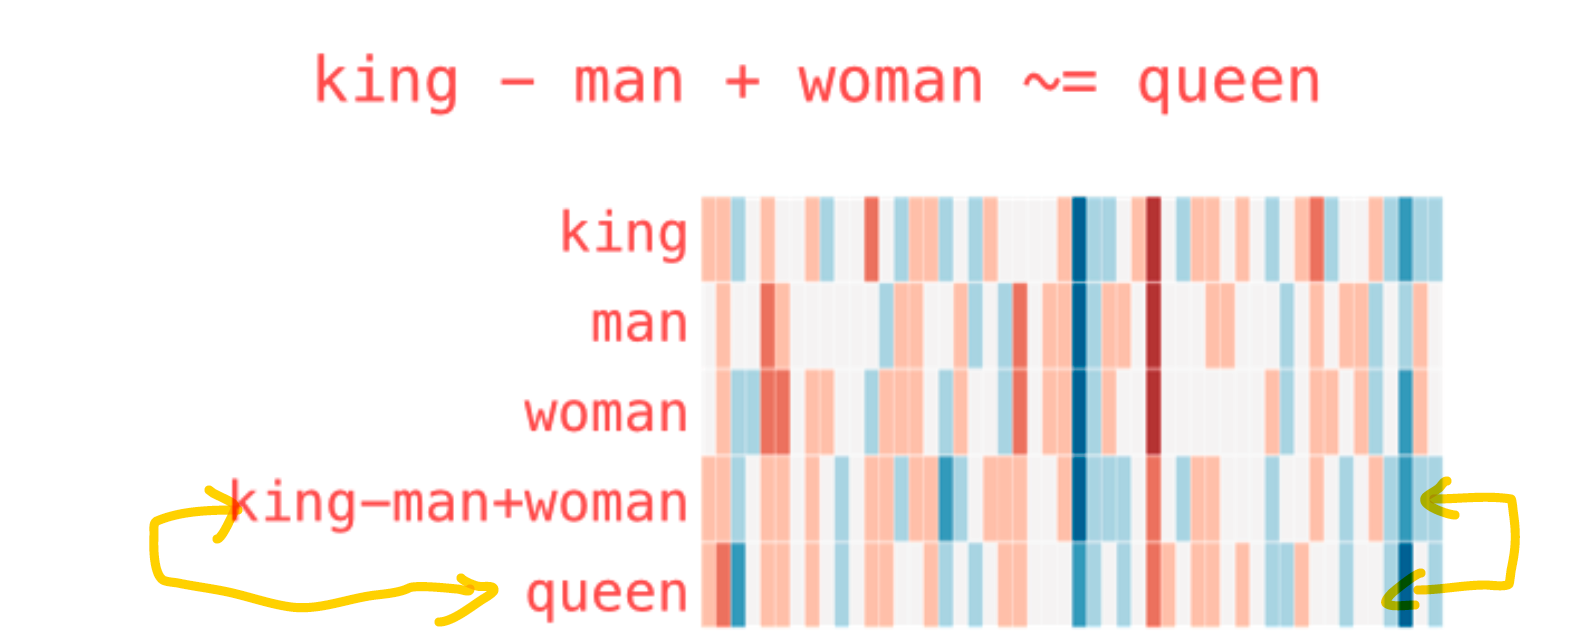

In [28]:
import gensim.downloader

# Show all available models in gensim-data

pprint(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']


In [29]:
# Download the "glove-twitter-25" embeddings

glove_vectors = gensim.downloader.load('glove-twitter-25')

# Use the downloaded vectors as usual:

glove_vectors.most_similar('twitter')


[==================================================] 100.0% 104.8/104.8MB downloaded


[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342359900474548),
 ('instagram', 0.9104822874069214),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885936737060547),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778460621833801),
 ('link', 0.877821147441864),
 ('internet', 0.8753897547721863)]

Implementing <font color='green'>fastText</font>
--
**fastText** is another deep learning framework developed by Facebook to capture context and meaning.

Problem
--
How to implement fastText in Python.

Solution
--
fastText is the improvised version of word2vec. word2vec basically
considers words to build the representation. But fastText takes each
character while computing the representation of the word.

In [30]:
# Let us see how to build a fastText word embedding.
# Import FastText
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

fast = FastText(sentences,window=1, min_count=1, workers=5, min_n=1, max_n=2)
# size=10 -> means size of vector to represent each token or word
# window=1 -> The maximum distance between the target word and its neighboring word.
# min_count=1 -> Minimium frequency count of words. 
#                The model would ignore words that do not satisfy the min_count.
#                Extremely infrequent words are usually unimportant.
# workers -> How many threads to use behind the scenes?
# min_n=1, max_n=2  -> When finding similarity or analogies like this :
# "Father" - "Boy" + "Girl" == "Mother"
#print(fast.most_similar(['girl', 'father'], ['boy'], topn=3))
# [('mother', 0.7996115684509277), ('grandfather', 0.7629683613777161), 
# ('wife', 0.7478234767913818)]
# we want the model to show min 1 and max 2 analogies


# vector for word nlp
print(fast.wv['nlp'])


[-3.56516754e-03  9.36979952e-04 -2.03097169e-03  1.33722881e-03
  1.06699055e-03 -1.30306487e-03  4.57685004e-04 -3.48509930e-04
  3.01728141e-04 -3.34166922e-04  2.30329041e-03 -2.13524234e-03
 -3.56490375e-03 -2.04235571e-03  1.60255615e-04  3.43305478e-03
  1.62065451e-04 -1.77059078e-03  2.40071415e-04 -2.91091506e-03
  4.31941869e-03 -2.14018277e-04  9.19649494e-04 -1.96734699e-03
  4.28779167e-04  1.97542226e-03 -5.55099454e-04 -7.46006321e-04
 -1.62504090e-04  4.60968731e-04 -4.12720675e-03 -3.73447617e-03
  7.81681912e-04  6.34804426e-04 -2.78657838e-03  1.03972619e-03
  7.23125529e-04  4.00802761e-04 -1.03636156e-03  6.72084687e-04
  5.93888923e-04  1.43508124e-03 -9.17497440e-04  1.16201758e-03
 -4.63208836e-03 -7.46966631e-04 -1.83029589e-03 -1.88780934e-04
  5.48301614e-04 -1.03316433e-03 -9.76110809e-04 -6.60458929e-04
 -1.04061491e-03  4.36936598e-03  3.69644910e-03 -2.38408986e-03
  1.00042357e-03  1.67955106e-04 -4.55268146e-03  8.84661626e-04
  2.27861642e-03 -1.24675

In [31]:
# Try this 
print(fast.wv.most_similar(['machine', 'learning'], ['nlp'], topn=3))

[('learn', 0.3527929484844208), ('love', 0.2343597263097763), ('industry', 0.16918526589870453)]



<hr>
<br><br>
<u><b>Further Resources</b></u> :

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

https://datascience.stackexchange.com/questions/22250/what-is-the-difference-between-a-hashing-vectorizer